In [ ]:
#pip install happybase

# Establishing connection between Host and our Hbase Table on VM & Loading Data 

In [12]:
import happybase

# Replace these values with your HBase server details
hbase_host = '192.168.198.154'
hbase_table = 'stocks'

# Establish a connection to HBase
connection = happybase.Connection(hbase_host)

# Open the table
table = connection.table(hbase_table)

# Example query: fetch the first 5 rows
rows = table.scan(limit=5)

# Iterate through the rows and print the data
for key, data in rows:
    print(f"Row Key: {key}, Data: {data}")

# Close the connection
connection.close()




Row Key: b'2020-12-25', Data: {b'price:close': b'2.2954', b'price:high': b'3.0885', b'price:low': b'0.2', b'price:open': b'0.2', b'volumn:volumn': b'1.25977552E8'}
Row Key: b'2020-12-26', Data: {b'price:close': b'1.5967', b'price:high': b'2.4609', b'price:low': b'1.5717', b'price:open': b'2.2958', b'volumn:volumn': b'5.70397E7'}
Row Key: b'2020-12-27', Data: {b'price:close': b'1.0612', b'price:high': b'1.6516', b'price:low': b'1.036', b'price:open': b'1.597', b'volumn:volumn': b'7.7797336E7'}
Row Key: b'2020-12-28', Data: {b'price:close': b'1.114', b'price:high': b'1.2787', b'price:low': b'1.0353', b'price:open': b'1.06', b'volumn:volumn': b'3.9346068E7'}
Row Key: b'2020-12-29', Data: {b'price:close': b'0.8845', b'price:high': b'1.1166', b'price:low': b'0.7541', b'price:open': b'1.114', b'volumn:volumn': b'5.3786032E7'}


# Creating Dataframe based on Data consumed From Hbase table "STOCKS"

In [18]:
import pandas as pd
import happybase

# Replace these values with your HBase server details
hbase_host = '192.168.198.154'
hbase_table = 'stocks'

# Establish a connection to HBase
connection = happybase.Connection(hbase_host)

# Open the table
table = connection.table(hbase_table)

# Scan HBase table and fetch data
data = []
for key, value in table.scan(limit=100):  # Limit to 100 rows
    # Decode row key (which includes the date)
    row_key = key.decode('utf-8')
    
    # Decode column names and values
    row_data = {col.decode('utf-8'): value[col].decode('utf-8') for col in value}
    
    # Include date in row data
    row_data['date'] = row_key
    
    data.append(row_data)

# Create DataFrame
df = pd.DataFrame(data)

# Display DataFrame
print(df.head())

# Close the HBase connection
connection.close()


  price:close price:high price:low price:open volumn:volumn        date
0      2.2954     3.0885       0.2        0.2  1.25977552E8  2020-12-25
1      1.5967     2.4609    1.5717     2.2958     5.70397E7  2020-12-26
2      1.0612     1.6516     1.036      1.597   7.7797336E7  2020-12-27
3       1.114     1.2787    1.0353       1.06   3.9346068E7  2020-12-28
4      0.8845     1.1166    0.7541      1.114   5.3786032E7  2020-12-29


# Checking for null values in our DataFrame

In [41]:
import pandas as pd

# Assuming your DataFrame is named df
# Check for null values in the entire DataFrame
print(df.isnull().sum())

# Check for null values in a specific column, for example, 'price:high'
print(df['price:high'].isnull().sum())


price:close      0
price:high       0
price:low        0
price:open       0
volumn:volumn    0
date             0
dtype: int64
0


# Line Plot: Closing Price Over Time

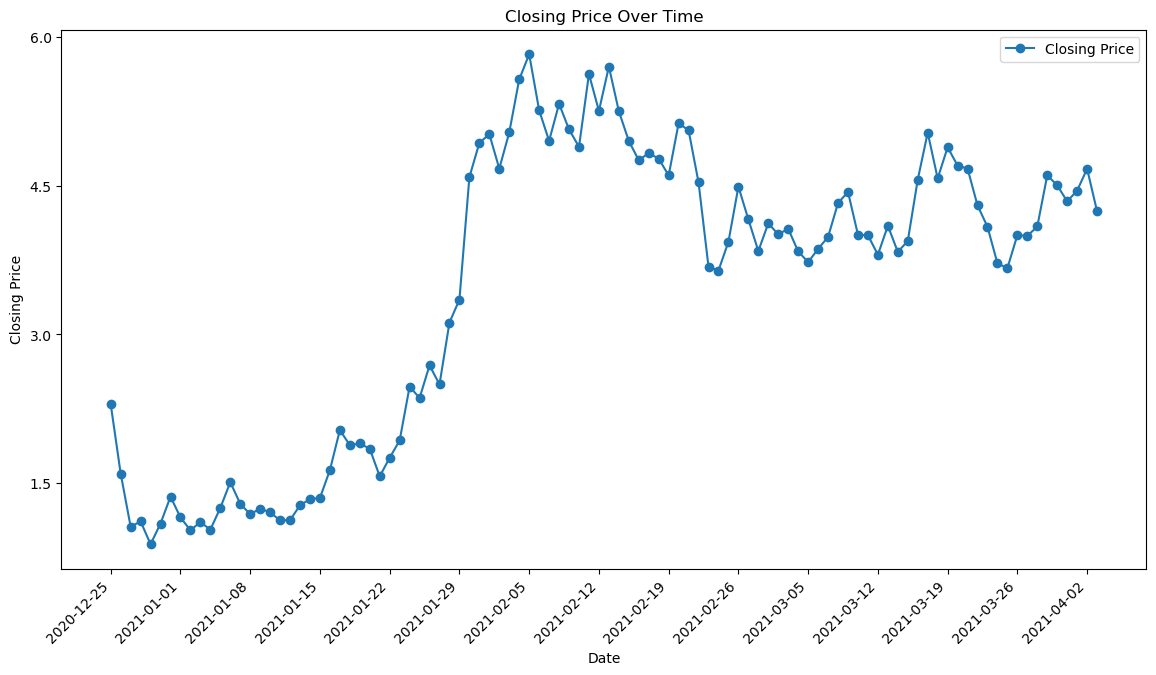

In [25]:
import matplotlib.pyplot as plt

# Convert 'price:close' to numeric
df['price:close'] = pd.to_numeric(df['price:close'], errors='coerce')

# Convert the 'date' column to datetime for proper sorting
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date')

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(df['date'], df['price:close'], label='Closing Price', marker='o')
plt.title('Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Show only every 7th date for better visibility
date_ticks = df['date'][::7]
plt.xticks(date_ticks, date_ticks.dt.strftime('%Y-%m-%d'), rotation=45, ha='right')

# Set y-axis tick frequency to show fewer ticks
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(prune='both', nbins=5))

plt.legend()
plt.show()


# Bar Plot: Average Daily Volume

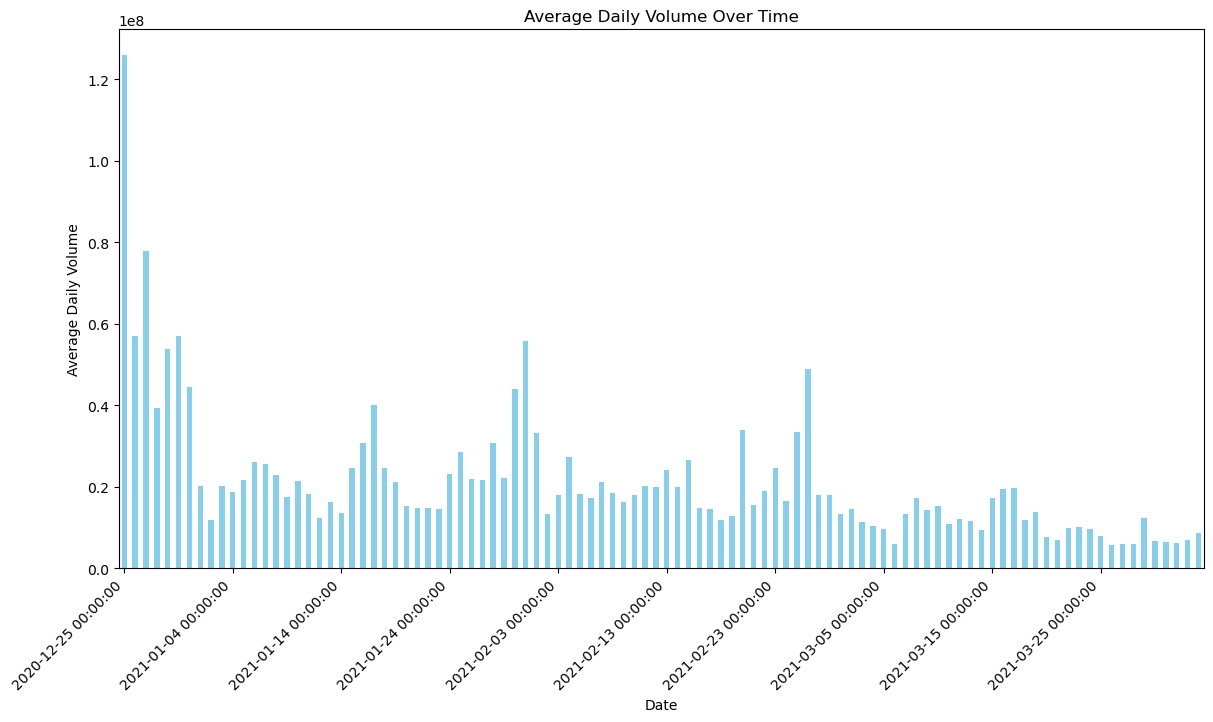

In [30]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# Convert 'volumn:volumn' to numeric
df['volumn:volumn'] = pd.to_numeric(df['volumn:volumn'], errors='coerce')

# Group by date and calculate the average volume
average_daily_volume = df.groupby('date')['volumn:volumn'].mean()

# Plotting
plt.figure(figsize=(14, 7))
average_daily_volume.plot(kind='bar', color='skyblue')
plt.title('Average Daily Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Average Daily Volume')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Set a maximum number of x-axis ticks
plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=10))

plt.show()



# Relationship between High and Low Prices

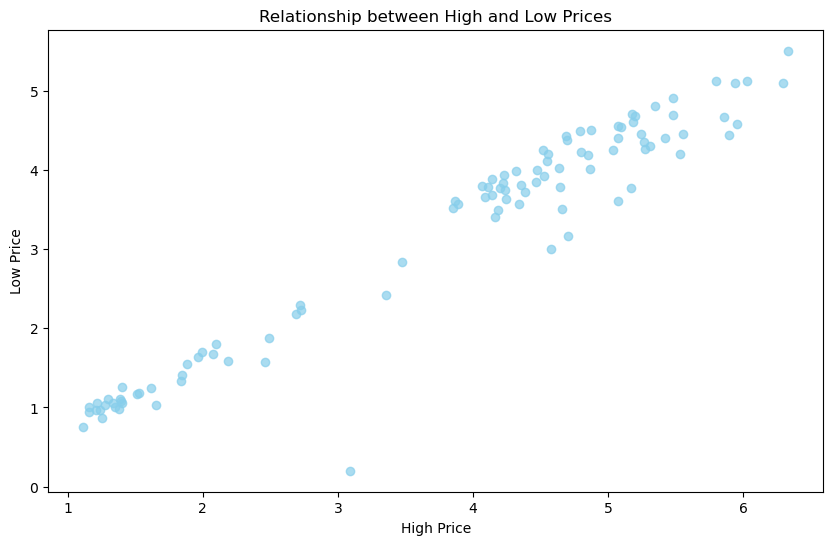

In [32]:
import pandas as pd

# Convert 'price:high' and 'price:low' columns to numeric
df['price:high'] = pd.to_numeric(df['price:high'], errors='coerce')
df['price:low'] = pd.to_numeric(df['price:low'], errors='coerce')

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['price:high'], df['price:low'], color='skyblue', alpha=0.7)
plt.title('Relationship between High and Low Prices')
plt.xlabel('High Price')
plt.ylabel('Low Price')
plt.show()


# Distribution of High Prices

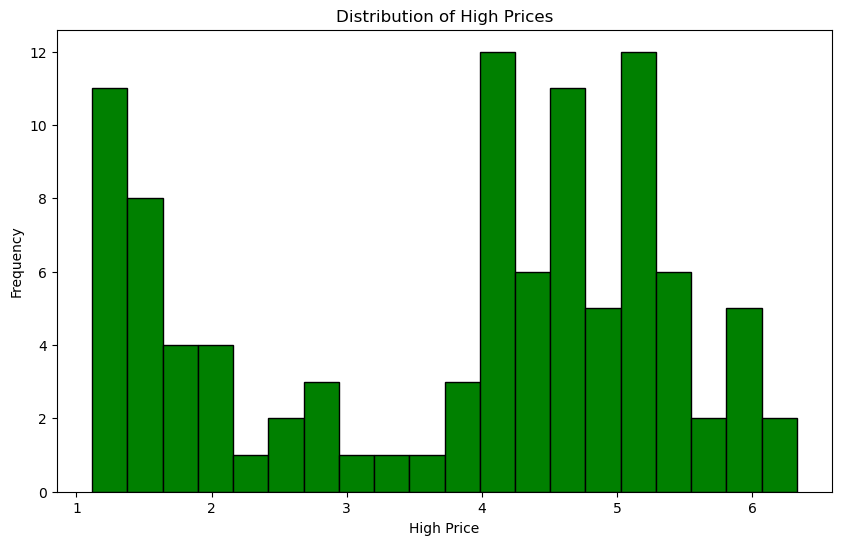

In [33]:
plt.figure(figsize=(10, 6))
plt.hist(df['price:high'], bins=20, color='green', edgecolor='black')
plt.title('Distribution of High Prices')
plt.xlabel('High Price')
plt.ylabel('Frequency')
plt.show()


# Correlation Matrix

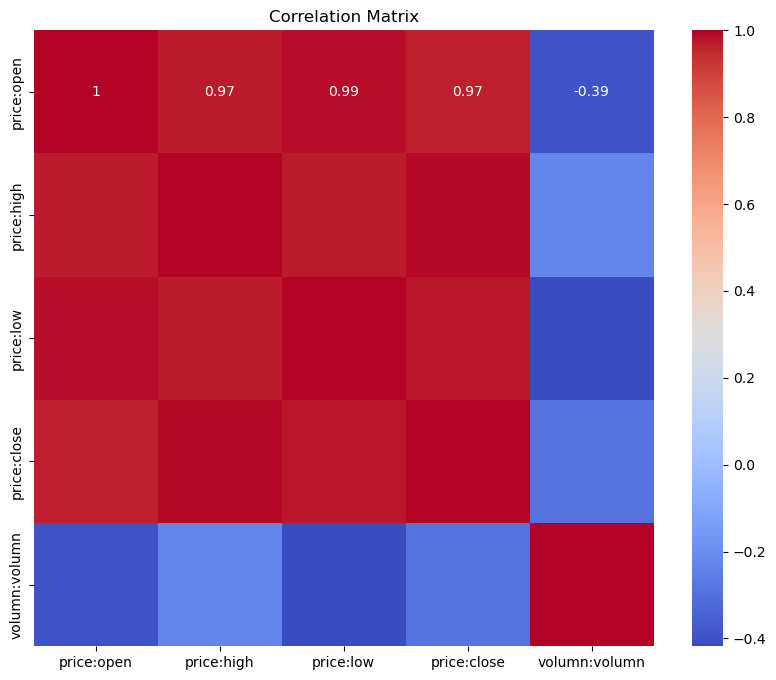

In [35]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[['price:open', 'price:high', 'price:low', 'price:close', 'volumn:volumn']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


# Candlestick Chart for Daily Prices

C:\Users\lenovo\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



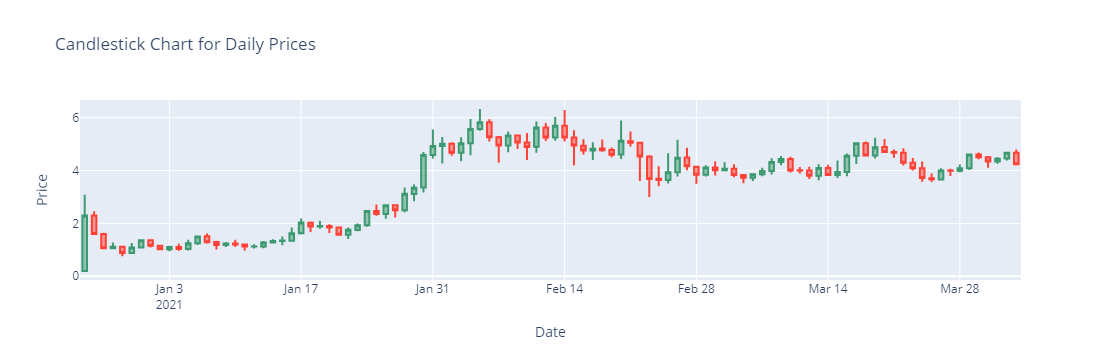

In [37]:
import plotly.graph_objects as go

# Convert 'date' to datetime format
df['date'] = pd.to_datetime(df['date'])

# Create candlestick chart
fig = go.Figure(data=[go.Candlestick(x=df['date'],
                open=df['price:open'],
                high=df['price:high'],
                low=df['price:low'],
                close=df['price:close'])])

# Customize layout
fig.update_layout(title='Candlestick Chart for Daily Prices',
                  xaxis_title='Date',
                  yaxis_title='Price',
                  xaxis_rangeslider_visible=False)

# Show the figure
fig.show()


C:\Users\lenovo\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



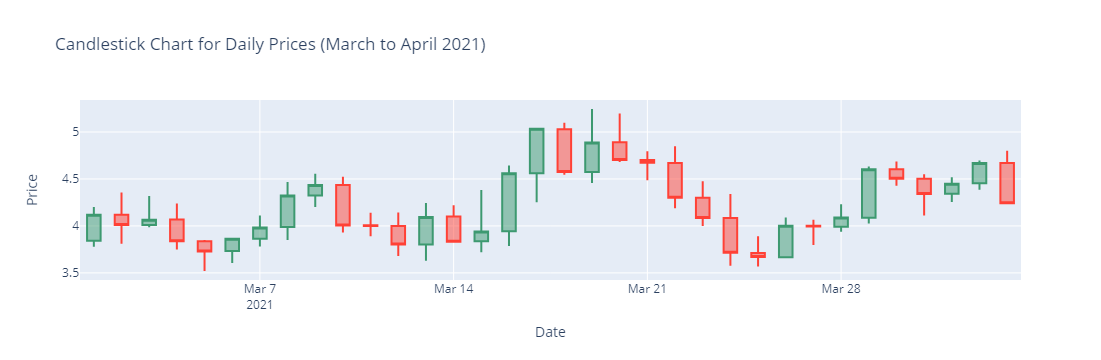

In [38]:
import plotly.graph_objects as go

# Convert 'date' to datetime format
df['date'] = pd.to_datetime(df['date'])

# Filter data for the specified date range (March 2021 to April 2021)
filtered_df = df[(df['date'] >= '2021-03-01') & (df['date'] <= '2021-04-30')]

# Create candlestick chart
fig = go.Figure(data=[go.Candlestick(x=filtered_df['date'],
                open=filtered_df['price:open'],
                high=filtered_df['price:high'],
                low=filtered_df['price:low'],
                close=filtered_df['price:close'])])

# Customize layout
fig.update_layout(title='Candlestick Chart for Daily Prices (March to April 2021)',
                  xaxis_title='Date',
                  yaxis_title='Price',
                  xaxis_rangeslider_visible=False)

# Show the figure
fig.show()


# 3D Scatter Plot - High, Low, and Volume

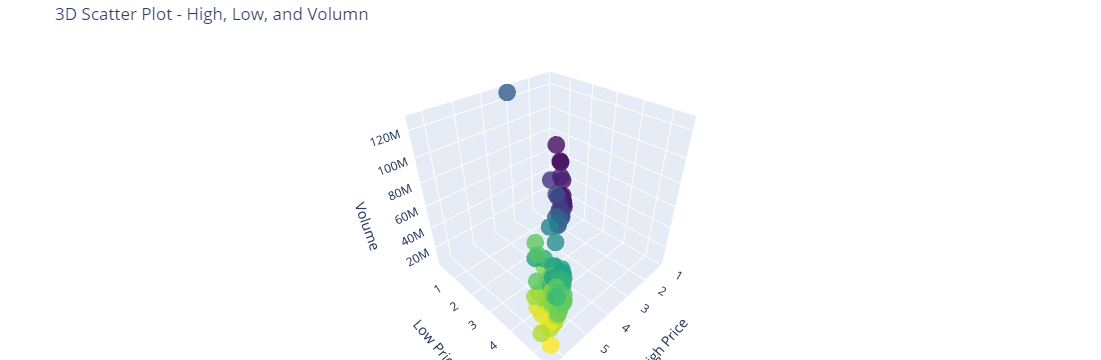

In [40]:
import plotly.graph_objects as go

# Convert 'date' to datetime format
df['date'] = pd.to_datetime(df['date'])

# Create 3D Scatter Plot
fig = go.Figure(data=[go.Scatter3d(
    x=df['price:high'],
    y=df['price:low'],
    z=df['volumn:volumn'],
    mode='markers',
    marker=dict(
        size=10,
        color=df['price:close'],  # Color by closing price
        colorscale='Viridis',  # Choose a colorscale
        opacity=0.8
    )
)])

# Customize layout
fig.update_layout(title='3D Scatter Plot - High, Low, and Volume',
                  scene=dict(
                      xaxis_title='High Price',
                      yaxis_title='Low Price',
                      zaxis_title='Volume'),
                  margin=dict(l=0, r=0, b=0, t=40))

# Show the figure
fig.show()
